In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [16]:
X = np.load("points.npy")
X.shape, X.dtype

((1000, 2), dtype('float32'))

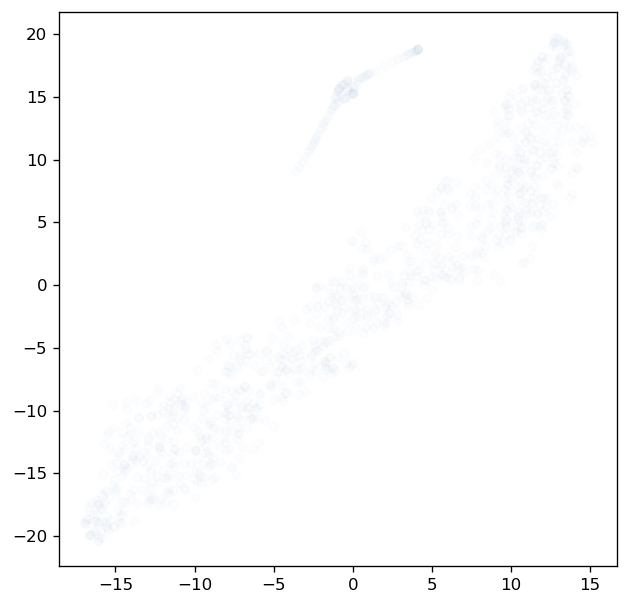

In [17]:
plt.figure(figsize=(6, 6), dpi=120)
plt.plot(X[:, 0], X[:, 1], ".", ms=10, alpha=0.01)

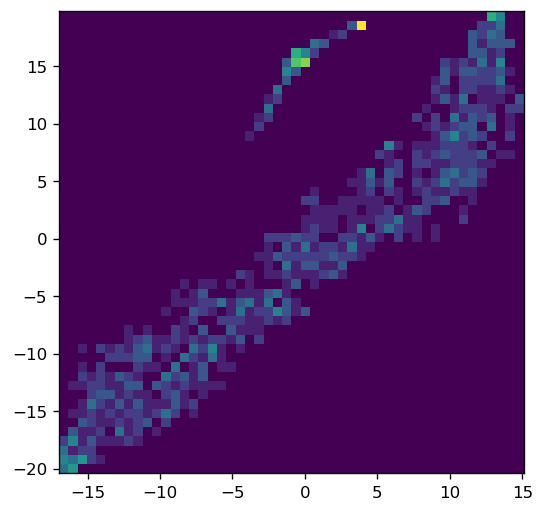

In [18]:
plt.figure(figsize=(5, 5), dpi=120)
plt.hist2d(X[:, 0], X[:, 1], bins=50);

(array([ 69., 109., 122., 103.,  87., 101., 108.,  94., 115.,  92.]),
 array([-20.403833  , -16.38807   , -12.372304  ,  -8.356539  ,
         -4.340774  ,  -0.32500935,   3.6907554 ,   7.70652   ,
         11.722285  ,  15.7380495 ,  19.753815  ], dtype=float32),
 <BarContainer object of 10 artists>)

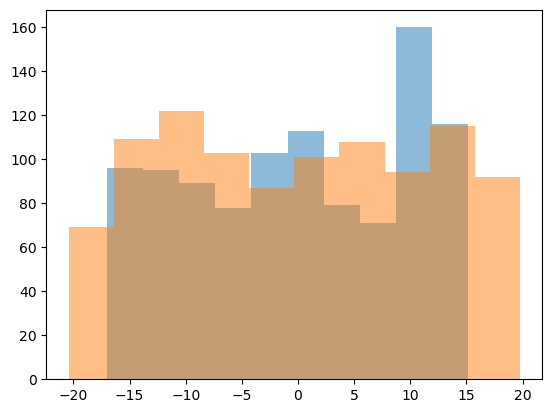

In [19]:
plt.hist(X[:,0], alpha=0.5)
plt.hist(X[:,1], alpha=0.5)

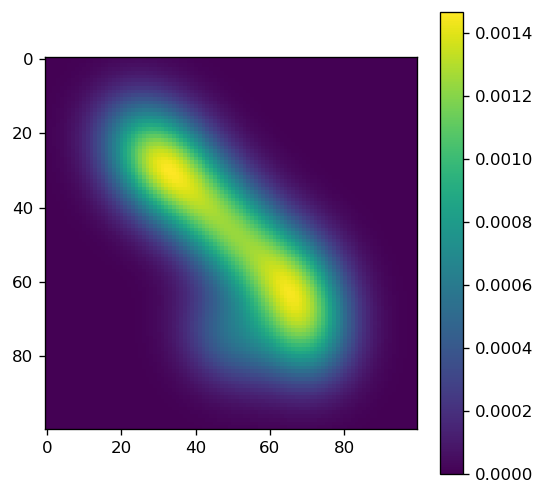

In [20]:
kde = KernelDensity(bandwidth=5, kernel="gaussian", algorithm="ball_tree")
kde.fit(X)

n = 100

xv, yv = np.linspace(-30, 30, n), np.linspace(-30, 30, n)
XX, YY = np.meshgrid(xv, yv)

Z = np.exp(kde.score_samples(np.stack([XX.reshape(-1), YY.reshape(-1)], axis=1)))

Z = Z.reshape(XX.shape)

plt.figure(figsize=(5, 5), dpi=120)
plt.imshow(Z)
plt.colorbar()

(100, 100)


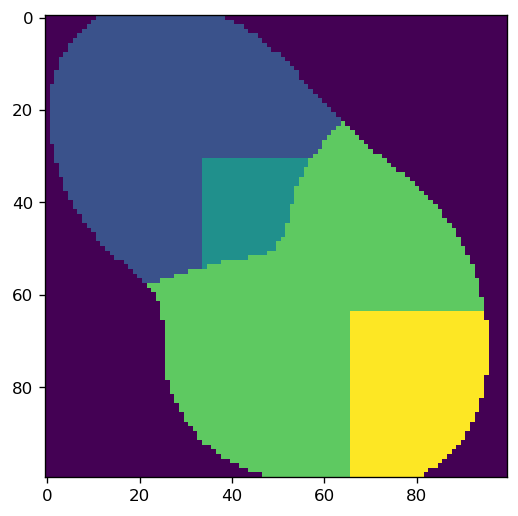

In [7]:
from skimage.segmentation import watershed

L = watershed(-Z)
print(L.shape)

L[Z < 1e-5] = 0

plt.figure(figsize=(5, 5), dpi=120)
plt.imshow(L)

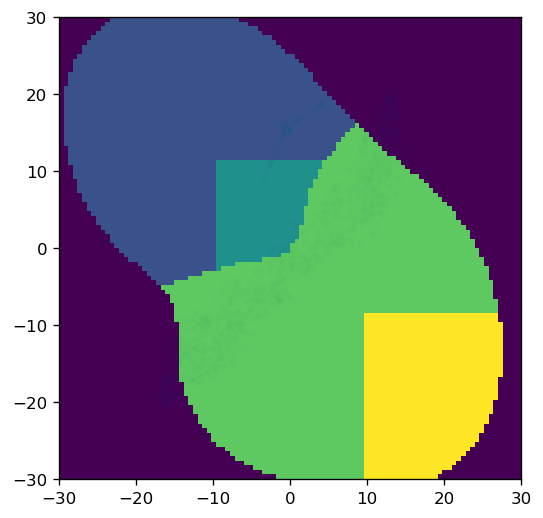

In [8]:
plt.figure(figsize=(5, 5), dpi=120)
plt.imshow(L, extent=(-30, 30, -30, 30))
plt.plot(X[:,0], X[:,1], ".", ms=5, alpha=0.01)

In [9]:
from scipy.interpolate import NearestNDInterpolator

interp = NearestNDInterpolator(np.stack([XX.reshape(-1), YY.reshape(-1)], axis=1), L.reshape(-1))
XL = interp(X)
XL.shape

(1000,)

In [10]:
#set(XL)

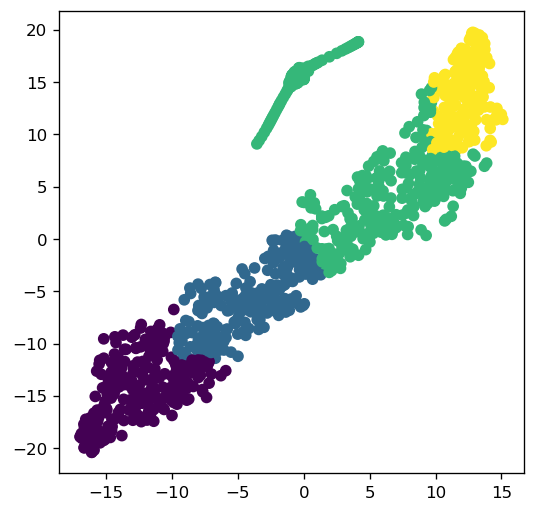

In [11]:
plt.figure(figsize=(5, 5), dpi=120)
plt.scatter(X[:, 0], X[:, 1], c=XL)

In [12]:
import pickle as pkl
with open('color_scheme.pkl', 'wb') as file:
    pkl.dump(XL, file)

In [13]:
with open('color_scheme.pkl', 'rb') as file:
    w = pkl.load(file)

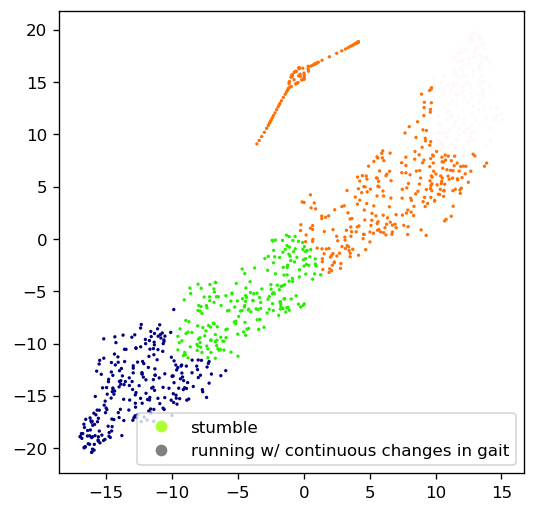

In [14]:
plt.figure(figsize=(5, 5), dpi=120)
plt.scatter(X[:, 0], X[:, 1], c=XL, s = 1, cmap = 'gist_ncar')
import matplotlib.lines as mlines

eight = mlines.Line2D([], [], color='greenyellow', marker='o', ls='', label='stumble')
nine = mlines.Line2D([], [], color='grey', marker='o', ls='', label='running w/ continuous changes in gait')
# etc etc
plt.legend(handles=[eight, nine])